In [57]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FMCD_y_MCM import mcd, mcm, mcd_3

importing Jupyter notebook from FMCD_y_MCM.ipynb


## Representación de una señal periódica

In [58]:
t = np.arange(0,10,0.001) # defino el rango temporal a representar
F0 = 10
xa = np.cos(2*np.pi*F0*t) # declaro la función a representar

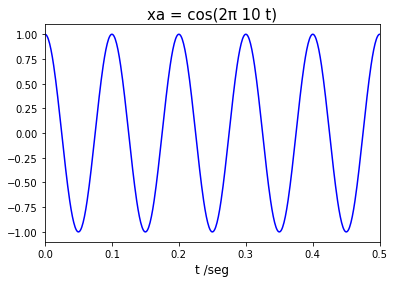

In [59]:
plt.plot(t,xa,color='b')
plt.xlim(0,0.5)
plt.xlabel('t /seg',fontsize=12)
plt.title('xa = cos(2π 10 t)',fontsize=15)
plt.show()

### Cómo determinar la Frecuencia de una señal compuesta por la suma (o resta) dos o más términos sinusoidales?

In [60]:
F1, F2 = 2, 8
xa1 = np.cos(2*np.pi*F1*t)
xa2 = np.cos(2*np.pi*F2*t)
xa3 = np.cos(2*np.pi*F1*t) + np.cos(2*np.pi*F2*t)

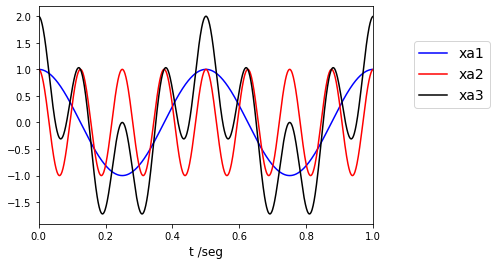

In [61]:
plt.plot(t,xa1,color='b')
plt.plot(t,xa2,color='r')
plt.plot(t,xa3,color='k')
plt.xlim(0,1) #limite al tiempo para representar
plt.xlabel('t /seg',fontsize=12)
plt.legend(('xa1','xa2','xa3'),prop={'size':14},bbox_to_anchor=(1.1,0.5))
plt.show()

T1 = 1/F1 = 1/2, T2 = 1/F2 = 1/8

In [62]:
print ("Cantidad de períodos de la xa2 que entran en xa1:", F2/F1)

Cantidad de períodos de la xa2 que entran en xa1: 4.0


In [63]:
print ("La frecuencia de la señal resultante es:", mcd (F2,F1))

La frecuencia de la señal resultante es: 2


### En caso que F1 y F2 son fraccionarios (ej: F1 = 2/3 y F2 = 5/4), la frecuencia de la señal será: 
### mcd(a/c, b/d) = mcd(a,b)/mcm(c,d) que es 1/12

In [64]:
mcd(2,5)/mcm(3,4), 1/12

(0.08333333333333333, 0.08333333333333333)

In [65]:
mcm(3,4)/mcd(2,5)

12.0

## Muestreo de la señal
### t→n/Fs

In [66]:
n = np.arange(len(t))
Fs = 100
x1 = np.cos(2*np.pi*(F0/Fs)*n)

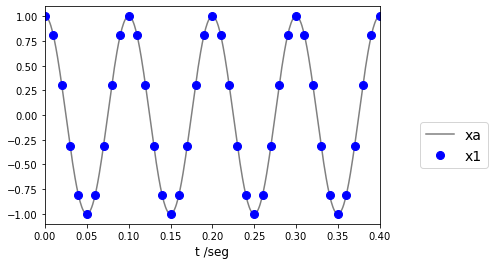

In [67]:
plt.plot(t,xa,color='gray')
plt.plot(n/Fs,x1,'ob',ms=8) #para poner todo en función del tiempo
plt.xlim(0,0.4)
plt.xlabel('t /seg',fontsize=12)
plt.legend(('xa','x1'),prop={'size':14},bbox_to_anchor=(1.1,0.5))
plt.show()

In [68]:
Fs/F0

10.0

## Propiedades de las señales periódicas de tiempo discreto
### 1) Movemos la señal un número entero de ciclos:  2π (F0/Fs)n + 2π k

In [69]:
x2 = np.cos(2*np.pi*(F0/Fs)*n + 2*np.pi*8)

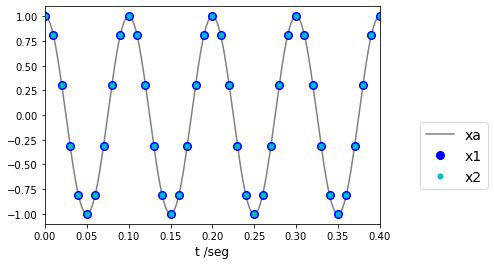

In [70]:
plt.plot(t,xa,color='gray')
plt.plot(n/Fs,x1,'ob',ms=8)
plt.plot(n/Fs,x2,'oc',ms=5)
plt.xlim(0,0.4)
plt.xlabel('t /seg',fontsize=12)
plt.legend(('xa','x1','x2'),prop={'size':14},bbox_to_anchor=(1.1,0.5))
plt.show()

### 2) Hacemos la frecuencia de la señal un múltiplo entero de la Fs:  2π ((F0+k Fs)/Fs)n = 2π (F0/Fs + k)n

Podemos observar que la señal es la misma si se le suma multiplos enteros de la señal de muestreo

In [71]:
x3 = np.cos(2*np.pi*(F0/Fs + 5)*n)

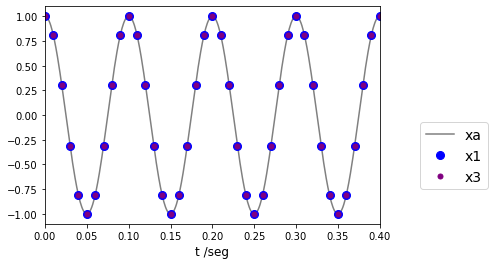

In [72]:
plt.plot(t,xa,color='gray')
plt.plot(n/Fs,x1,'ob',ms=8)
plt.plot(n/Fs,x3,'o',c='purple',ms=5)
plt.xlim(0,0.4)
plt.xlabel('t /seg',fontsize=12)
plt.legend(('xa','x1','x3'),prop={'size':14},bbox_to_anchor=(1.1,0.5))
plt.show()

F(k) = F0 + k Fs → F(k)/Fs  = F0/Fs + k → f(k) = f0 + k → 2π f(k) = 2π f0 + 2π k → ω(k) = ω0 + 2πk

ω(k) es la frecuencia angular relativa en rad

F0 frecuencia de la señal

Fs frecuencia de muestreo

### 3) Pequeños cambios en f pueden llevar a grandes cambios en N

N: período fundamental en muestras


In [73]:
F0

10

In [74]:
F4 = 11
x4 = np.cos(2*np.pi*(F4/Fs)*n)

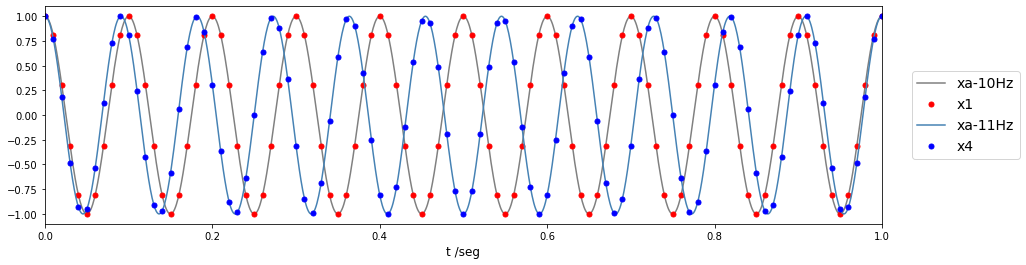

In [75]:
plt.figure(figsize=(15,4))
plt.plot(t,xa,color='gray')
plt.plot(n/Fs,x1,'or',ms=5)
plt.plot(t,np.cos(2*np.pi*F4*t),color='steelblue')
plt.plot(n/Fs,x4,'o',c='b',ms=5)
plt.xlim(0,1)
plt.xlabel('t /seg',fontsize=12)
plt.legend(('xa-10Hz','x1','xa-11Hz','x4'),prop={'size':14},bbox_to_anchor=(1.1,0.5))
plt.show()

In [76]:
Fs=100
print ("La frecuencia relativa con F0 = 10 Hz y Fs = 100 Hz es f = ", F0/Fs)
print ("La frecuencia relativa con F4 = 11 Hz y Fs = 100 Hz es f = ", F4/Fs)

La frecuencia relativa con F0 = 10 Hz y Fs = 100 Hz es f =  0.1
La frecuencia relativa con F4 = 11 Hz y Fs = 100 Hz es f =  0.11


N0 = 10, N4 = ? 

N: el período en muestras 

k: cantidad de ciclos de la analogica que se necesita para completar un período de dígital

- - -

frecuencia relativa (f) = F0 / Fs = 10 / 100 = k / N0 ---> k = 1 y N0 = 10 (10 muestras de la señal dígital para 1 período de la señal analógica)

frecuencia relativa (f) = F4 / Fs = 11 / 100 = k / N4 ---> k = 11 y N4 = 100 (100 muestras de la señal dígital para 11 período de la señal analógica)

## Familia de senoidales armónicamente relacionadas
### x(k) = cos(2π k (F0/Fs) n) = cos(2π k n/N)
### Tomando F0 = 10 y Fs = 200, ¿cuántas señales diferentes de período N = 20 hay?

In [77]:
F0, Fs, k1, k2, k3, k4, k5, k6, k7, k8, k9 = 10, 200, 1, 2, 4, 5, 10, 19, 18, 16, 15
x1 = np.cos(2*np.pi*k1*(F0/Fs)*n)
x2 = np.cos(2*np.pi*k2*(F0/Fs)*n)
x3 = np.cos(2*np.pi*k3*(F0/Fs)*n)
x4 = np.cos(2*np.pi*k4*(F0/Fs)*n)
x6 = np.cos(2*np.pi*k6*(F0/Fs)*n)
x7 = np.cos(2*np.pi*k7*(F0/Fs)*n)
x8 = np.cos(2*np.pi*k8*(F0/Fs)*n)
x9 = np.cos(2*np.pi*k9*(F0/Fs)*n)

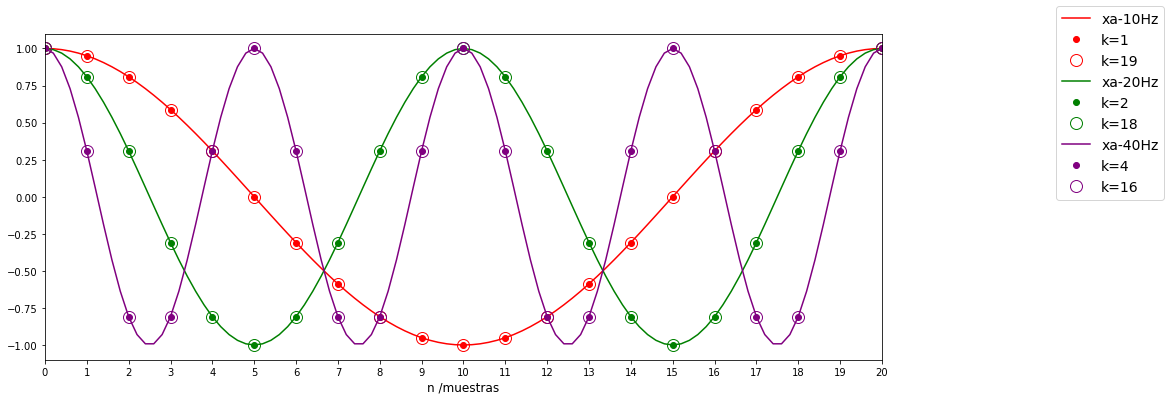

In [78]:
plt.figure(figsize=(15,6))
plt.plot(t*Fs,np.cos(2*np.pi*k1*F0*t),color='r')
plt.plot(n,x1,'ro',ms=6)
plt.plot(n,x6,'ro',ms=12, mfc='none')
plt.plot(t*Fs,np.cos(2*np.pi*k2*F0*t),color='g')
plt.plot(n,x2,'go',ms=6)
plt.plot(n,x7,'go',ms=12, mfc='none')
plt.plot(t*Fs,np.cos(2*np.pi*k3*F0*t),color='purple')
plt.plot(n,x3,'o',color='purple',ms=6)
plt.plot(n,x8,'o',color='purple',ms=12, mfc='none')
plt.xlim(0,20)
plt.xticks(np.arange(0,21))
plt.xlabel('n /muestras',fontsize=12)
plt.legend(('xa-10Hz','k=1','k=19','xa-20Hz','k=2','k=18','xa-40Hz','k=4','k=16'),
           prop={'size':14},bbox_to_anchor=(1.2,0.47))
plt.show()

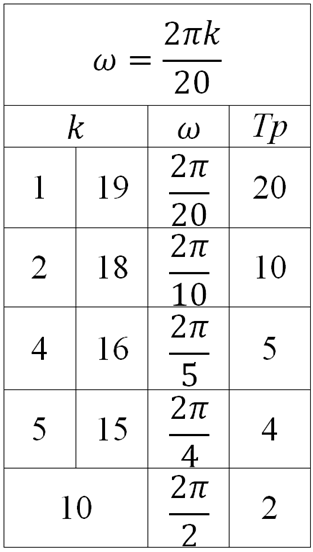